# LOAN PREDICITION - Target columns is Interest Rate

## Import required libraries

In [3]:
import pandas as pd
import numpy as np 
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Read the data

In [4]:

df=pd.read_csv('loan_data_train (1).csv')

In [5]:
df.head(10)

,ID,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,79542.0,25000,25000,18.49%,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,75473.0,19750,19750,17.27%,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,67265.0,2100,2100,14.33%,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,80167.0,28000,28000,16.29%,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,17240.0,24250,17431.82,12.23%,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years
5,32737.0,5400,5375,8.90%,36 months,small_business,6.27%,OH,RENT,3000.00,785-789,2,90,2.0,NaN
6,71685.0,16000,16000,22.47%,60 months,credit_card,11.27%,CA,RENT,4791.67,665-669,5,8474,0.0,2 years
7,38028.0,6400,6400,7.51%,36 months,major_purchase,9.58%,IL,RENT,6400.00,735-739,11,12306,1.0,< 1 year
8,32119.0,24000,23772.15,12.99%,60 months,home_improvement,15.54%,NC,MORTGAGE,8333.33,740-744,24,56984,0.0,NaN
9,84563.0,8000,8000,7.62%,36 months,other,0%,NC,MORTGAGE,3500.00,765-769,7,0,1.0,NaN


## Exploratory Data Analysis

In [6]:
df.isnull().sum()

ID                                 1
Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               1
State                              1
Home.Ownership                     1
Monthly.Income                     3
FICO.Range                         0
Open.CREDIT.Lines                  4
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 69
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              2199 non-null   float64
 1   Amount.Requested                2199 non-null   object 
 2   Amount.Funded.By.Investors      2199 non-null   object 
 3   Interest.Rate                   2200 non-null   object 
 4   Loan.Length                     2199 non-null   object 
 5   Loan.Purpose                    2199 non-null   object 
 6   Debt.To.Income.Ratio            2199 non-null   object 
 7   State                           2199 non-null   object 
 8   Home.Ownership                  2199 non-null   object 
 9   Monthly.Income                  2197 non-null   float64
 10  FICO.Range                      2200 non-null   object 
 11  Open.CREDIT.Lines               2196 non-null   object 
 12  Revolving.CREDIT.Balance        21

In [9]:
df.drop(['ID','Amount.Funded.By.Investors'],axis=1,inplace=True)

In [10]:
df['Interest.Rate'] = list(map(lambda x: x[:-1], df['Interest.Rate'].values))
df['Interest.Rate'] = (df['Interest.Rate'].astype(float))




In [11]:
df

,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,25000,18.49,60 months,debt_consolidation,27.56%,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,19750,17.27,60 months,debt_consolidation,13.39%,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,2100,14.33,36 months,major_purchase,3.50%,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,28000,16.29,36 months,credit_card,19.62%,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,24250,12.23,60 months,credit_card,23.79%,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2195,30000,23.28,60 months,other,12.10%,IL,MORTGAGE,7083.33,675-679,16,17969,1.0,10+ years
2196,4200,14.33,60 months,car,14.16%,NJ,RENT,3850.00,700-704,4,5718,0.0,2 years
2197,19800,15.31,60 months,debt_consolidation,15.03%,IL,MORTGAGE,6666.67,675-679,10,46879,3.0,6 years
2198,18000,20.99,60 months,credit_card,11.63%,CA,RENT,9051.83,670-674,5,32394,2.0,4 years


In [12]:
#df['Debt.To.Income.Ratio'] = list(map(lambda x: x[:-1], df['Debt.To.Income.Ratio'].values))

df['Debt.To.Income.Ratio'] = (df['Debt.To.Income.Ratio'].str.strip('%').astype(float))

In [13]:
# dividing percentage columns by 100
df['Debt.To.Income.Ratio'] = df['Debt.To.Income.Ratio']/100
df['Interest.Rate'] = df['Interest.Rate']/100

In [14]:
df.head(5)

,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,25000,0.1849,60 months,debt_consolidation,0.2756,VA,MORTGAGE,8606.56,720-724,11,15210,3.0,5 years
1,19750,0.1727,60 months,debt_consolidation,0.1339,NY,MORTGAGE,6737.50,710-714,14,19070,3.0,4 years
2,2100,0.1433,36 months,major_purchase,0.0350,LA,OWN,1000.00,690-694,13,893,1.0,< 1 year
3,28000,0.1629,36 months,credit_card,0.1962,NV,MORTGAGE,7083.33,710-714,12,38194,1.0,10+ years
4,24250,0.1223,60 months,credit_card,0.2379,OH,MORTGAGE,5833.33,730-734,6,31061,2.0,10+ years


### Handling the FICO - Range

### FICO RANGE tells about the credit worthiness of the user

In [15]:
#df['Fico.Range'] = df['Fico.Range'].astype('str') + '-' + df['Fico.Range'].astype('str')

df['Fico.Range_Low'] = df['FICO.Range'].map(lambda x:str(x)[0:3])

In [16]:
df['Fico.Range_High'] = df['FICO.Range'].map(lambda x:str(x)[4:7])

In [17]:
df['Fico.Range_Low'] = (df['Fico.Range_Low'].astype(int))
df['Fico.Range_High'] = (df['Fico.Range_High'].astype(int))

### Calculating Mean FICO range from FICO low and FICO High

In [18]:
df['meanfico'] = (df['Fico.Range_Low'] + df['Fico.Range_High'])/2

In [19]:
df['meanfico'] = (df['meanfico'].astype(int))

In [20]:
df.drop(['FICO.Range','Fico.Range_Low','Fico.Range_High'],1, inplace=True)

## Null Value Treatment 

In [21]:
df.isnull().sum()

Amount.Requested                   1
Interest.Rate                      0
Loan.Length                        1
Loan.Purpose                       1
Debt.To.Income.Ratio               1
State                              1
Home.Ownership                     1
Monthly.Income                     3
Open.CREDIT.Lines                  4
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 69
meanfico                           0
dtype: int64

### Employment.Length

In [22]:
df['Employment.Length'].replace(to_replace='[^0-9]+', value='', inplace=True, regex=True)



In [23]:
df['Employment.Length']= df['Employment.Length'].str.rstrip('\'')

In [24]:
df['Employment.Length']= df['Employment.Length'].str.lstrip('\'')

In [25]:
df['Employment.Length']= df['Employment.Length'].replace(""''"")

In [26]:
df['Employment.Length'].fillna(value=0,inplace=True)


In [27]:
df['Employment.Length'] = df['Employment.Length'].astype(int)

In [28]:
#df['Revolving.CREDIT.Balance'].head(10)

df['Revolving.CREDIT.Balance']= df['Revolving.CREDIT.Balance'].replace('.',0)



# df['Revolving.CREDIT.Balance']

In [29]:
df['Revolving.CREDIT.Balance'] =df['Revolving.CREDIT.Balance'].astype(float)

In [41]:
### Replacing Missing values with 0; as the column specifies ( amount that is to be requested)
### cannot replace with with either mean/median or mode 

In [30]:
df['Amount.Requested']= df['Amount.Requested'].replace('.',0)

In [31]:
df['Amount.Requested'] =df['Amount.Requested'].astype(float)

In [37]:
df['Amount.Requested'] = df['Amount.Requested'].fillna(0)

In [42]:
## Replacing Missing credit lines with 0 

In [43]:
df['Open.CREDIT.Lines']= df['Open.CREDIT.Lines'].replace('.',0)

In [44]:
df['Open.CREDIT.Lines'] =df['Open.CREDIT.Lines'].astype(float)

In [46]:
df['Loan.Length'] = df['Loan.Length'].fillna(0)

In [47]:
df['Debt.To.Income.Ratio'] = df['Debt.To.Income.Ratio'].fillna(0.00)

In [48]:
df['Open.CREDIT.Lines'] = df['Open.CREDIT.Lines'].fillna(0)
df['Revolving.CREDIT.Balance'] = df['Revolving.CREDIT.Balance'].fillna(0)
df['Inquiries.in.the.Last.6.Months'] = df['Inquiries.in.the.Last.6.Months'].fillna(0)
#df['Loan.Length'] = df['Loan.Length'].fillna(0)

In [49]:
df.isnull().sum()

Amount.Requested                  0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      1
Debt.To.Income.Ratio              0
State                             1
Home.Ownership                    1
Monthly.Income                    3
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
meanfico                          0
dtype: int64

### Categorical Missing Values - Should be replaced with mode ( highest frequency/occur)rence) in most of the cases. Or It can simply be replaced with NA/NaN/N values 

In [50]:
df = df.fillna(df.mode().iloc[0])
df.head(10)

,Amount.Requested,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,meanfico
0,25000.0,0.1849,60 months,debt_consolidation,0.2756,VA,MORTGAGE,8606.56,11.0,15210.0,3.0,5,722
1,19750.0,0.1727,60 months,debt_consolidation,0.1339,NY,MORTGAGE,6737.50,14.0,19070.0,3.0,4,712
2,2100.0,0.1433,36 months,major_purchase,0.0350,LA,OWN,1000.00,13.0,893.0,1.0,1,692
3,28000.0,0.1629,36 months,credit_card,0.1962,NV,MORTGAGE,7083.33,12.0,38194.0,1.0,10,712
4,24250.0,0.1223,60 months,credit_card,0.2379,OH,MORTGAGE,5833.33,6.0,31061.0,2.0,10,732
5,5400.0,0.0890,36 months,small_business,0.0627,OH,RENT,3000.00,2.0,90.0,2.0,0,787
6,16000.0,0.2247,60 months,credit_card,0.1127,CA,RENT,4791.67,5.0,8474.0,0.0,2,667
7,6400.0,0.0751,36 months,major_purchase,0.0958,IL,RENT,6400.00,11.0,12306.0,1.0,1,737
8,24000.0,0.1299,60 months,home_improvement,0.1554,NC,MORTGAGE,8333.33,24.0,56984.0,0.0,0,742
9,8000.0,0.0762,36 months,other,0.0000,NC,MORTGAGE,3500.00,7.0,0.0,1.0,0,767


In [51]:
df.isnull().sum()

Amount.Requested                  0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
State                             0
Home.Ownership                    0
Monthly.Income                    0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
meanfico                          0
dtype: int64

## Slice DATASET into categorical and Numerical Features

In [52]:
## Splitting the colums into numeric and categorical features


num_cols = df.select_dtypes(include='number')
cat_cols = df.select_dtypes(include='object')

In [55]:
num_cols.head()

,Amount.Requested,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,meanfico
0,25000.0,0.1849,0.2756,8606.56,11.0,15210.0,3.0,5,722
1,19750.0,0.1727,0.1339,6737.50,14.0,19070.0,3.0,4,712
2,2100.0,0.1433,0.0350,1000.00,13.0,893.0,1.0,1,692
3,28000.0,0.1629,0.1962,7083.33,12.0,38194.0,1.0,10,712
4,24250.0,0.1223,0.2379,5833.33,6.0,31061.0,2.0,10,732


In [54]:
cat_cols.head()

,Loan.Length,Loan.Purpose,State,Home.Ownership
0,60 months,debt_consolidation,VA,MORTGAGE
1,60 months,debt_consolidation,NY,MORTGAGE
2,36 months,major_purchase,LA,OWN
3,36 months,credit_card,NV,MORTGAGE
4,60 months,credit_card,OH,MORTGAGE


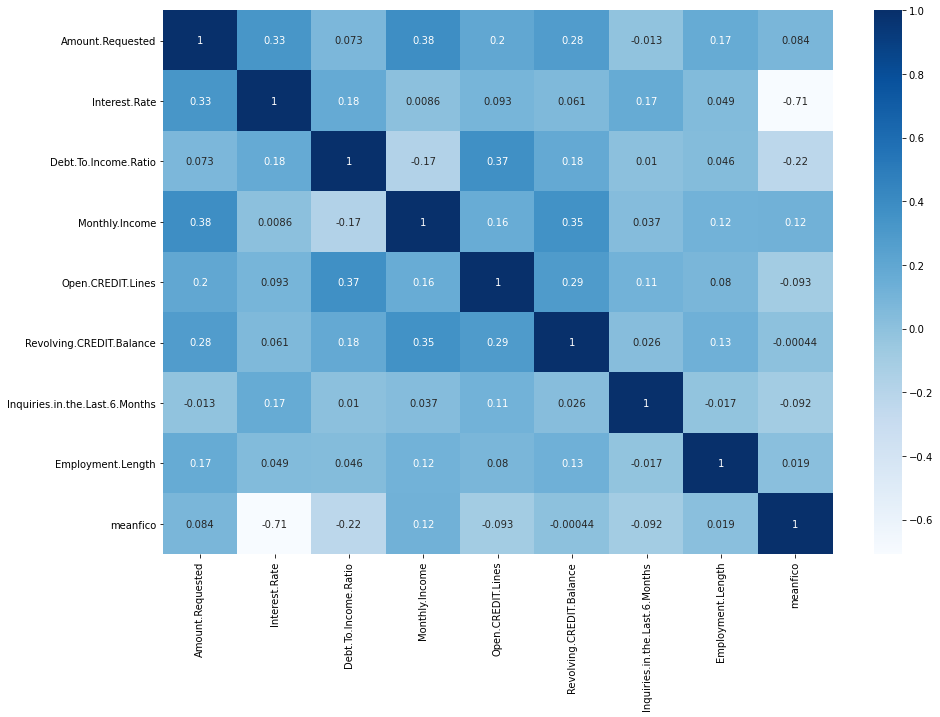

In [151]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = num_cols.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,10))
#plot heat map
g=sns.heatmap(num_cols[top_corr_features].corr(),annot=True,cmap="Blues")

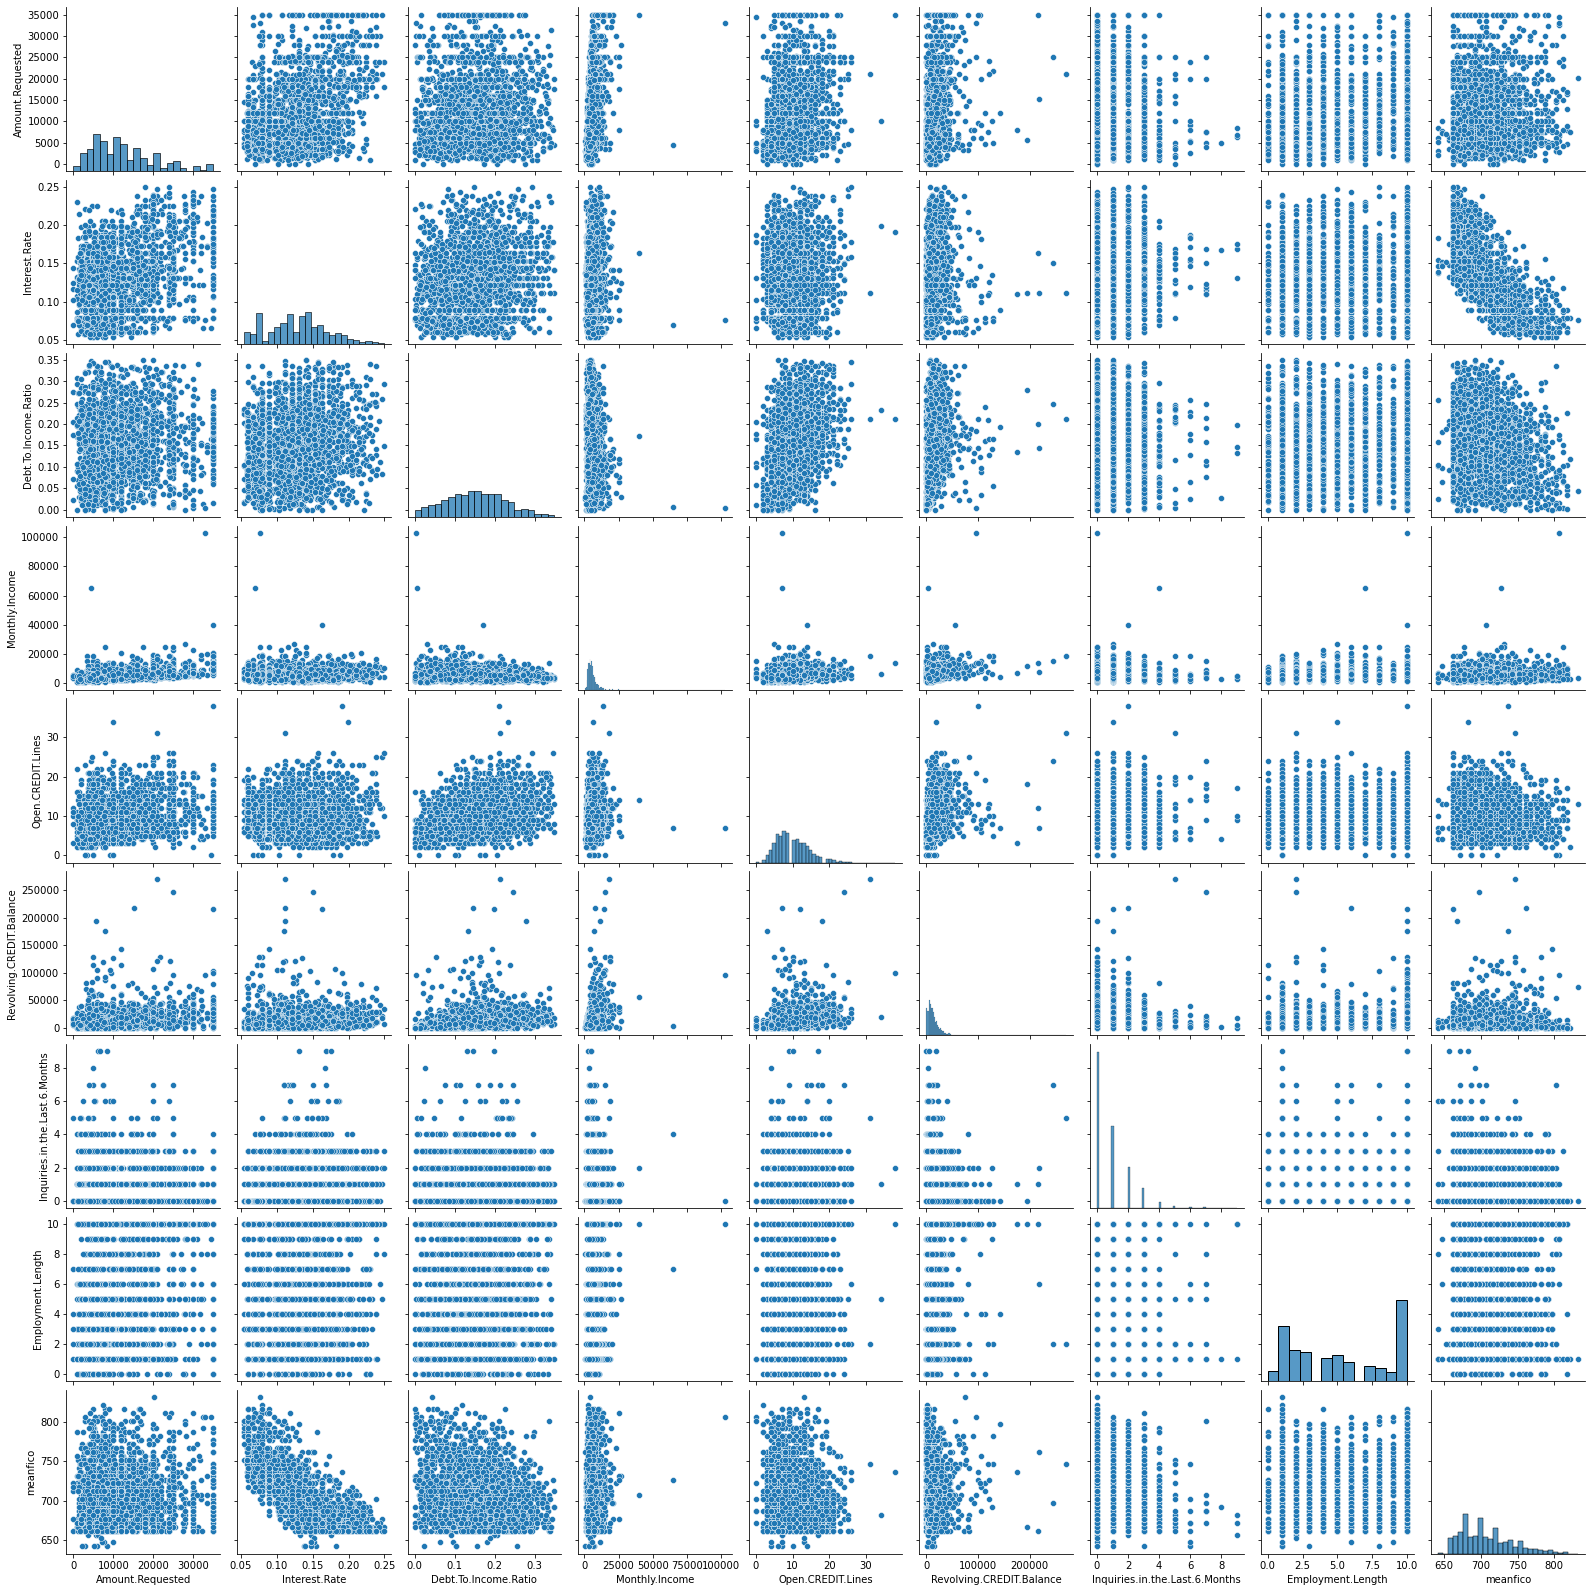

In [152]:
sns.pairplot(num_cols)

#### There seems to be a lot of overlapping datapoints.. the linear regression model would not do justice to the problem statement as the error rate could be high. It might lead to overfitting. For our referece we will see how the model performs with Random Forrest Regressor 

In [164]:
display(cat_cols['Loan.Length'].unique())
display(cat_cols['Loan.Purpose'].unique())
display(cat_cols['State'].unique())
display(cat_cols['Home.Ownership'].unique())

array(['60 months', '36 months', 0, '.'], dtype=object)

array(['debt_consolidation', 'major_purchase', 'credit_card',
       'small_business', 'home_improvement', 'other', 'car', 'moving',
       'house', 'educational', 'vacation', 'wedding', 'medical',
       'renewable_energy'], dtype=object)

array(['VA', 'NY', 'LA', 'NV', 'OH', 'CA', 'IL', 'NC', 'NJ', 'WA', 'CT',
       'AK', 'CO', 'MA', 'TX', 'VT', 'OK', 'FL', 'NH', 'GA', 'MN', 'MD',
       'WY', 'PA', 'AL', 'AZ', 'SC', 'MI', 'OR', 'RI', 'NM', 'MO', 'WI',
       'KY', 'UT', 'AR', 'WV', 'DE', 'MT', 'KS', 'DC', 'SD', 'HI', 'IN',
       'MS', '.'], dtype=object)

array(['MORTGAGE', 'OWN', 'RENT', 'OTHER', 'NONE'], dtype=object)

In [165]:
df['Loan.Length'].value_counts()

36 months    1722
60 months     476
0 months        2
Name: Loan.Length, dtype: int64

In [141]:
df['Loan.Length'].replace(0, '0 months',inplace=True)
df['Loan.Length'].replace('.', '0 months',inplace=True)

In [142]:
df['Loan.Length'].value_counts()

36 months    1722
60 months     476
0 months        2
Name: Loan.Length, dtype: int64

In [144]:
#df.iloc[np.where(df['Loan.Length']==0)]

# Cleaned dataset used in tableau

In [ ]:
#df.to_excel("dff.xlsx")

# Model Building

In [166]:
final_dataset=pd.get_dummies(df,drop_first=True)

In [167]:
final_dataset.head()

,Amount.Requested,Interest.Rate,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,meanfico,Loan.Length_36 months,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Home.Ownership_NONE,Home.Ownership_OTHER,Home.Ownership_OWN,Home.Ownership_RENT
0,25000.0,0.1849,0.2756,8606.56,11.0,15210.0,3.0,5,722,0,...,1,0,0,0,0,0,0,0,0,0
1,19750.0,0.1727,0.1339,6737.50,14.0,19070.0,3.0,4,712,0,...,0,0,0,0,0,0,0,0,0,0
2,2100.0,0.1433,0.0350,1000.00,13.0,893.0,1.0,1,692,1,...,0,0,0,0,0,0,0,0,1,0
3,28000.0,0.1629,0.1962,7083.33,12.0,38194.0,1.0,10,712,1,...,0,0,0,0,0,0,0,0,0,0
4,24250.0,0.1223,0.2379,5833.33,6.0,31061.0,2.0,10,732,0,...,0,0,0,0,0,0,0,0,0,0


In [168]:
import seaborn as sns

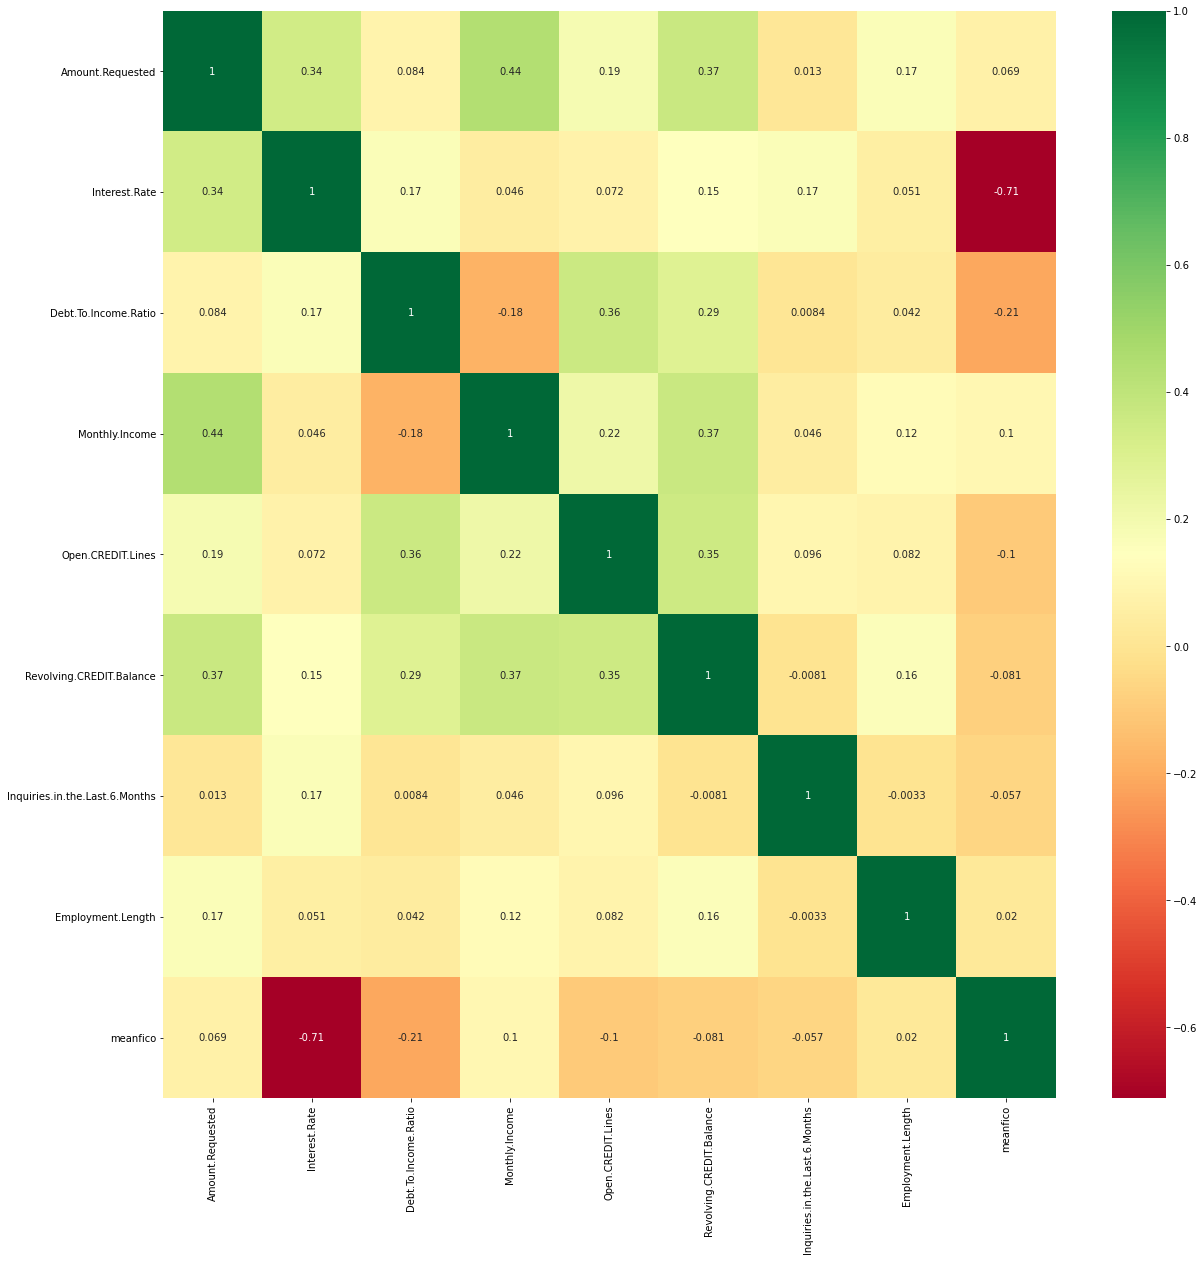

In [94]:
import seaborn as sns
#get correlations of each features in dataset
corrmat = df_o.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df_o[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [170]:
final_dataset.keys()

Index(['Amount.Requested', 'Interest.Rate', 'Debt.To.Income.Ratio',
       'Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length', 'meanfico',
       'Loan.Length_36 months', 'Loan.Length_60 months',
       'Loan.Purpose_credit_card', 'Loan.Purpose_debt_consolidation',
       'Loan.Purpose_educational', 'Loan.Purpose_home_improvement',
       'Loan.Purpose_house', 'Loan.Purpose_major_purchase',
       'Loan.Purpose_medical', 'Loan.Purpose_moving', 'Loan.Purpose_other',
       'Loan.Purpose_renewable_energy', 'Loan.Purpose_small_business',
       'Loan.Purpose_vacation', 'Loan.Purpose_wedding', 'State_AK', 'State_AL',
       'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC',
       'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IL', 'State_IN',
       'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_MI',
       'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC'

# Random Forrest Regressor

In [203]:
X = final_dataset.copy()

In [204]:
X = final_dataset.copy()

In [205]:
X.drop('Interest.Rate',axis=1,inplace=True)

In [206]:
y = final_dataset['Interest.Rate']

In [207]:
X.head()

,Amount.Requested,Debt.To.Income.Ratio,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length,meanfico,Loan.Length_36 months,Loan.Length_60 months,...,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY,Home.Ownership_NONE,Home.Ownership_OTHER,Home.Ownership_OWN,Home.Ownership_RENT
0,25000.0,0.2756,8606.56,11.0,15210.0,3.0,5,722,0,1,...,1,0,0,0,0,0,0,0,0,0
1,19750.0,0.1339,6737.50,14.0,19070.0,3.0,4,712,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2100.0,0.0350,1000.00,13.0,893.0,1.0,1,692,1,0,...,0,0,0,0,0,0,0,0,1,0
3,28000.0,0.1962,7083.33,12.0,38194.0,1.0,10,712,1,0,...,0,0,0,0,0,0,0,0,0,0
4,24250.0,0.2379,5833.33,6.0,31061.0,2.0,10,732,0,1,...,0,0,0,0,0,0,0,0,0,0


In [208]:
y.head()

0    0.1849
1    0.1727
2    0.1433
3    0.1629
4    0.1223
Name: Interest.Rate, dtype: float64

In [209]:
### Feature Importance

from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [210]:
print(model.feature_importances_)

[6.92725938e-02 1.20327892e-02 9.85293806e-03 1.99652819e-02
 9.80855274e-03 2.36254964e-02 8.45656089e-03 5.52445499e-01
 3.32168693e-03 1.80784800e-01 3.90439213e-03 5.25929860e-03
 4.01158184e-04 3.41340064e-03 7.47845699e-04 2.30422015e-03
 4.74051590e-04 2.29212439e-03 4.79616186e-03 2.02134760e-05
 3.56707298e-03 8.90821072e-04 1.12410267e-03 1.49544835e-03
 6.61766317e-04 1.99510132e-04 2.33695341e-03 6.13580343e-03
 1.66315575e-03 2.68300534e-03 1.60701148e-03 2.43680972e-04
 4.08081642e-03 2.91391523e-03 4.30131298e-04 3.54135240e-03
 2.74457248e-04 1.72878489e-03 4.34536691e-04 9.84906232e-04
 1.44460710e-03 1.53309272e-03 1.58153594e-03 1.66598827e-03
 9.14627319e-04 2.60209766e-05 9.11459375e-05 2.20529135e-03
 1.84978627e-03 1.83932999e-03 6.20015668e-04 4.49656480e-04
 4.77625166e-03 2.75906242e-03 1.41461531e-03 6.92935377e-04
 2.20317133e-03 2.65174651e-04 9.33733055e-04 2.64035108e-04
 5.44105614e-03 1.43804163e-03 2.45695658e-03 1.57802410e-04
 2.27156313e-03 1.417613

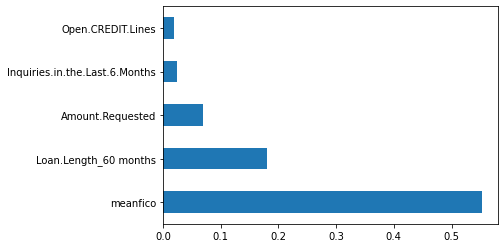

In [211]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [212]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [213]:
from sklearn.ensemble import RandomForestRegressor

In [214]:
regressor=RandomForestRegressor()

In [215]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
print(n_estimators)

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [216]:
from sklearn.model_selection import RandomizedSearchCV

In [217]:
 #Randomized Search CV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [218]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [219]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()

In [220]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [221]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   1.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   1.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [222]:
rf_random.best_score_

-0.00033143439003655505

In [223]:
predictions=rf_random.predict(X_test)

In [243]:
## the predicted values are normally distributed which shows it is a good model

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Interest.Rate', ylabel='Density'>

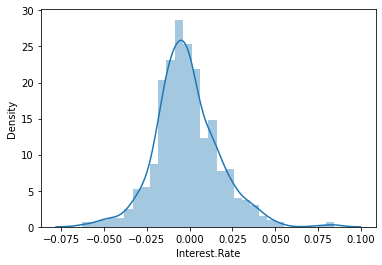

In [224]:
sns.distplot(y_test-predictions)

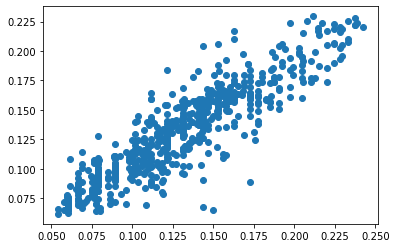

In [225]:
plt.scatter(y_test,predictions)

In [226]:
from sklearn import metrics

In [227]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.014055346493352775
MSE: 0.0003489350685185538
RMSE: 0.01867980376017248


# Linear Regression

In [228]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [229]:
from sklearn.linear_model import LinearRegression
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [230]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(X, mlr.coef_))

Intercept:  0.7202852329292883
Coefficients:


[('Amount.Requested', 1.6893011874079927e-06),
 ('Debt.To.Income.Ratio', 0.003970569691533304),
 ('Monthly.Income', -2.6596912435402186e-07),
 ('Open.CREDIT.Lines', -0.00033330355931245395),
 ('Revolving.CREDIT.Balance', -2.1108065187229463e-08),
 ('Inquiries.in.the.Last.6.Months', 0.0034030307593067508),
 ('Employment.Length', -6.270486666361524e-05),
 ('meanfico', -0.0008554889394010662),
 ('Loan.Length_36 months', 0.000414540294856729),
 ('Loan.Length_60 months', 0.031208158257963588),
 ('Loan.Purpose_credit_card', -0.0029984744161819627),
 ('Loan.Purpose_debt_consolidation', -0.0021497332690884052),
 ('Loan.Purpose_educational', 0.005840190450969215),
 ('Loan.Purpose_home_improvement', -3.059739859011414e-05),
 ('Loan.Purpose_house', 0.00140825080070693),
 ('Loan.Purpose_major_purchase', 0.001110001316343183),
 ('Loan.Purpose_medical', -0.001265125455457151),
 ('Loan.Purpose_moving', 0.014170169006908744),
 ('Loan.Purpose_other', 0.00821583368859601),
 ('Loan.Purpose_renewable_ener

In [231]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.18075106 0.11532477 0.18734513 0.10315055 0.15915293 0.15719247
 0.12960787 0.17127276 0.0698507  0.11835446 0.09808887 0.10732109
 0.12288381 0.16850107 0.1216954  0.12682959 0.09509124 0.08397413
 0.08198018 0.10618621 0.13525149 0.09751098 0.18298717 0.14064536
 0.09049893 0.17825079 0.1023287  0.15122601 0.17199048 0.13909921
 0.14811604 0.12553574 0.12933674 0.12510544 0.14765395 0.09806935
 0.13828058 0.05681455 0.18597963 0.11705539 0.10802612 0.14472383
 0.13862074 0.10263228 0.11997557 0.18498431 0.16886211 0.09045504
 0.06668662 0.14421257 0.17016202 0.15394987 0.11078434 0.15607777
 0.12766479 0.11634318 0.20846181 0.1278703  0.13444607 0.11489077
 0.17477654 0.13970802 0.08072876 0.13501206 0.07170463 0.1182401
 0.16811001 0.10799511 0.08690127 0.22127263 0.08812816 0.15058227
 0.19060602 0.06833701 0.10435823 0.09668915 0.14415399 0.14618912
 0.11012596 0.10212613 0.12840034 0.12131893 0.08334099 0.14009392
 0.11796726 0.18428439 0.14274839 0.19

In [232]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
1743,0.2148,0.180751
1777,0.1212,0.115325
972,0.1969,0.187345
1958,0.0991,0.103151
2058,0.1531,0.159153


In [233]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(X,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 76.54
Mean Absolute Error: 0.015864100442424128
Mean Square Error: 0.0004219447967308613
Root Mean Square Error: 0.02054129491368208


In [234]:
final_dataset.keys()

Index(['Amount.Requested', 'Interest.Rate', 'Debt.To.Income.Ratio',
       'Monthly.Income', 'Open.CREDIT.Lines', 'Revolving.CREDIT.Balance',
       'Inquiries.in.the.Last.6.Months', 'Employment.Length', 'meanfico',
       'Loan.Length_36 months', 'Loan.Length_60 months',
       'Loan.Purpose_credit_card', 'Loan.Purpose_debt_consolidation',
       'Loan.Purpose_educational', 'Loan.Purpose_home_improvement',
       'Loan.Purpose_house', 'Loan.Purpose_major_purchase',
       'Loan.Purpose_medical', 'Loan.Purpose_moving', 'Loan.Purpose_other',
       'Loan.Purpose_renewable_energy', 'Loan.Purpose_small_business',
       'Loan.Purpose_vacation', 'Loan.Purpose_wedding', 'State_AK', 'State_AL',
       'State_AR', 'State_AZ', 'State_CA', 'State_CO', 'State_CT', 'State_DC',
       'State_DE', 'State_FL', 'State_GA', 'State_HI', 'State_IL', 'State_IN',
       'State_KS', 'State_KY', 'State_LA', 'State_MA', 'State_MD', 'State_MI',
       'State_MN', 'State_MO', 'State_MS', 'State_MT', 'State_NC'

In [235]:
## 

x = final_dataset[['Open.CREDIT.Lines','Inquiries.in.the.Last.6.Months','Amount.Requested','Loan.Length_60 months','meanfico']]
y = final_dataset['Interest.Rate']

In [236]:
x.head()

,Open.CREDIT.Lines,Inquiries.in.the.Last.6.Months,Amount.Requested,Loan.Length_60 months,meanfico
0,11.0,3.0,25000.0,1,722
1,14.0,3.0,19750.0,1,712
2,13.0,1.0,2100.0,0,692
3,12.0,1.0,28000.0,0,712
4,6.0,2.0,24250.0,1,732


In [237]:
#Splitting the dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 100)

In [238]:
from sklearn.linear_model import LinearRegression
#Fitting the Multiple Linear Regression model
mlr = LinearRegression()  
mlr.fit(x_train, y_train)

LinearRegression()

In [239]:
#Intercept and Coefficient
print("Intercept: ", mlr.intercept_)
print("Coefficients:")
list(zip(x, mlr.coef_))

Intercept:  0.7158796244467593
Coefficients:


[('Open.CREDIT.Lines', -0.0005376366489516545),
 ('Inquiries.in.the.Last.6.Months', 0.0035898143446854627),
 ('Amount.Requested', 1.4534403552325983e-06),
 ('Loan.Length_60 months', 0.03249435154358341),
 ('meanfico', -0.0008586823803393667)]

In [240]:
#Prediction of test set
y_pred_mlr= mlr.predict(x_test)
#Predicted values
print("Prediction for test set: {}".format(y_pred_mlr))

Prediction for test set: [0.1627656  0.11474652 0.18916526 0.1147888  0.14983321 0.14847383
 0.12780935 0.17394296 0.06765397 0.11583859 0.09957416 0.10720526
 0.11034942 0.17132909 0.1229745  0.10680154 0.09665311 0.07907564
 0.08759307 0.09691358 0.13706114 0.09831377 0.18032644 0.1371039
 0.09453414 0.18278182 0.10485029 0.1483671  0.17086893 0.14128258
 0.1416517  0.12234431 0.13302758 0.11388219 0.15509785 0.10276016
 0.14875077 0.05648057 0.1869685  0.11364932 0.11030385 0.150398
 0.14124789 0.09931644 0.11870307 0.1876143  0.16951404 0.07470384
 0.06483715 0.15238322 0.17339116 0.15642396 0.11270134 0.15784459
 0.13504947 0.11832089 0.20711593 0.11502437 0.13642192 0.11846619
 0.17086581 0.13993979 0.08403283 0.13661756 0.0718497  0.12599841
 0.17356816 0.11094056 0.09780178 0.21521151 0.09113263 0.14441111
 0.19469294 0.06825988 0.11186693 0.10122065 0.14513996 0.1471558
 0.10204033 0.0998466  0.12570774 0.12402405 0.08636849 0.14044793
 0.12195538 0.17849989 0.14424733 0.19423

In [241]:
#Actual value and the predicted value
mlr_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_mlr})
mlr_diff.head()

,Actual value,Predicted value
1743,0.2148,0.162766
1777,0.1212,0.114747
972,0.1969,0.189165
1958,0.0991,0.114789
2058,0.1531,0.149833


In [242]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_mlr)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_mlr)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_mlr))
print('R squared: {:.2f}'.format(mlr.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 75.54
Mean Absolute Error: 0.014905888202113783
Mean Square Error: 0.0003815002194584936
Root Mean Square Error: 0.019532030602538324
